# [01] VOC Data Exploration

이번 실습에서는 주어진 데이터가 어떻게 구성되어 있는지를 살펴보는 것을 통하여, 학습을 위한 데이터셋과 모델의 형태가 어떻게 구성되어야 하는지 고민해보도록 하겠습니다. 데이터를 다운받기 위해 터미널에서 다음의 명령어를 실행합니다.

```
1. cd 명령어를 이용해 현재 디렉토리의 위치로 이동합니다.

2. 다음의 명령어를 입력해 datasetting.sh 파일을 실행합니다.
```

In [ ]:
# '! + 명령어'를 이용해 Notebook에서 터미널 명령어를 실행할 수 있습니다.
! chmod +x ./datasetting.sh
! ./datasetting.sh

명령어를 통해 구성된 데이터의 디렉토리는 다음과 같습니다.
```
--[data]
   ----- [VOCdevkit] (이미지와 라벨 정보들이 담겨있음)
   ----- *.json (이미지와 라벨 정보의 경로를 연결한 json파일들)
```

다음의 명령어의 주석을 해제하여 어떤 파일명으로 구성되어 있는지 확인해 봅시다.

In [2]:
#!ls ./data/VOC
#!echo ''
#!ls ./data/VOC/VOCdevkit/VOC2007/JPEGImages/
#!ls ./data/VOC/VOCdevkit/VOC2007/Annotations/

-------------------
## 1. 데이터 살펴보기 (1)

본격적으로 데이터를 살펴보기에 앞서, json 파일을 열어 어떤 정보들이 들어있는지 살펴보도록 하겠습니다.

In [1]:
import json

with open('./data/VOC/label_map.json') as jsonfile:
    label_maps = json.load(jsonfile)

with open('./data/VOC/TRAIN_images.json') as jsonfile:
    train_images = json.load(jsonfile)

with open('./data/VOC/TRAIN_objects.json') as jsonfile:
    train_labels = json.load(jsonfile)

# Class 라벨의 구성에 대한 정보
print('Label Map: \n')
print(label_maps)

# 1 개의 샘플 데이터에 대한 이미지 정보
print('\nImage 정보: \n')
print(train_images[16])

# 1개의 샘플 데이터에 대한 라벨 정보
print('\nLabel 정보: \n')
print(train_labels[16])

# 총 데이터의 수
print('총 데이터 개수: %d' % (len(train_images)))

Label Map: 

{'aeroplane': 1, 'bicycle': 2, 'bird': 3, 'boat': 4, 'bottle': 5, 'bus': 6, 'car': 7, 'cat': 8, 'chair': 9, 'cow': 10, 'diningtable': 11, 'dog': 12, 'horse': 13, 'motorbike': 14, 'person': 15, 'pottedplant': 16, 'sheep': 17, 'sofa': 18, 'train': 19, 'tvmonitor': 20, 'background': 0}

Image 정보: 

/home/gihun/jupyter/LG_project/LG_VisionModule3/ObjectDetection/data/VOC/VOCdevkit/VOC2007/JPEGImages/000035.jpg

Label 정보: 

{'boxes': [[0, 95, 190, 360], [217, 97, 464, 317], [467, 194, 499, 316], [2, 303, 499, 374]], 'labels': [15, 15, 15, 11], 'difficulties': [0, 0, 1, 1]}
총 데이터 개수: 16551


-------------------
## 1. 데이터 살펴보기 (2) - 예시 데이터 출력하기

이번에는 데이터의 이미지를 출력하고, 데이터셋에 대한 개략적인 정보를 살펴보도록 하겠습니다.

(이미지가 보이지 않는 경우, 다시 실행해 보세요!)

높이(Height): 375, 너비(Width) 500, 채널(Channel): 3
최댓값: 255.0, 최솟값: 0.0



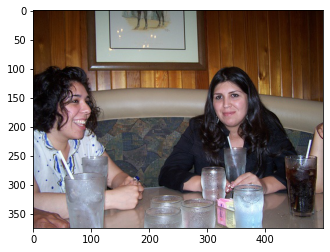

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import pandas as pd

# 예시 파일을 설정합니다.
file = train_images[16]

# 이미지를 불러옵니다.
im = np.array(Image.open(file), dtype=np.uint8)

# 이미지를 출력합니다.
fig,ax = plt.subplots(1)
ax.imshow(im)
# 이미지의 shape을 출력합니다.
print("높이(Height): %d, 너비(Width) %d, 채널(Channel): %d" % (im.shape))
print("최댓값: %2.1f, 최솟값: %2.1f\n" % (np.max(im), np.min(im)))

-----------
### [Task 1] 데이터 위에 Bounding Box와 라벨 표시하기
<실습 목표> : 
- **`img_anno_shower`** 함수를 완성합니다.
- **`annotation_getter`** 함수 데이터의 idx를 입력했을 때, label 정보와 연동하여 각 Box를 이미지 위에 그리고 Class정보를 표시합니다.
- Boundig Box의 annotation은 (x0, y0, h, w)로 구성되어 있습니다.

    - (x0, y0) <-- Bounding Box의 Upper Left 꼭짓점
    - (h, w) <-- Bounding Box의 높이와 너비

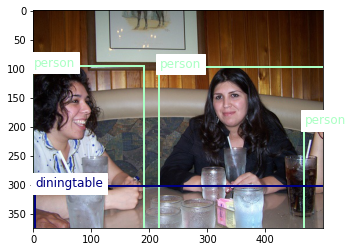

16번 데이터에는 총 4 개의 물체가 있습니다. 



<Figure size 432x288 with 0 Axes>

In [4]:
from materials.utils import *

def img_anno_shower(idx, train_images, train_labels):
    # 이미지를 불러옵니다.
    im = np.array(Image.open(train_images[idx]), dtype=np.uint8)

    # 이미지를 출력합니다.
    fig,ax = plt.subplots(1)
    ax.imshow(im)

    # 이미지의 shape을 저장합니다. 
    img_h, img_w, _ = im.shape
    
    # bounding box를 그립니다.
    for i, (box, label) in enumerate(zip(train_labels[idx]['boxes'], train_labels[idx]['labels'])):
        # [ToDo]: box의 정보를 받아옵니다.
        x0, y0, w, h = box
        rect = patches.Rectangle((x0, y0), w, h,
                                 linewidth=2, edgecolor=distinct_colors[label], 
                                 facecolor='none')
        ax.add_patch(rect)
        ax.text(x=x0+1, y=y0+1, s=rev_label_map[label], color=distinct_colors[label], fontsize=12, backgroundcolor='1',alpha=1)
    
    plt.show()
    plt.tight_layout()
    print('%d번 데이터에는 총 %d 개의 물체가 있습니다. \n' % (idx, i+1))

img_anno_shower(16, train_images, train_labels)

---------
### <생각해 봅시다>

- 여러 idx로 바꾸어 가며 확인해봅시다. Bounding Box의 정확도가 어떤가요?
- 잘못 labeling 된 Bounding Box는 학습에 어떤 영향을 미치게 되나요?

------------